In [ ]:
%%capture
# Installs Unsloth, Xformers (Flash Attention) and all other packages!
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps "xformers<0.0.27" "trl<0.9.0" peft accelerate bitsandbytes

* 우리는 Llama, Mistral, Phi-3, Gemma, Yi, DeepSeek, Qwen, TinyLlama, Vicuna, Open Hermes 등을 지원합니다.
* 우리는 16비트 LoRA 또는 4비트 QLoRA를 지원합니다. 둘 다 2배 빠릅니다.
* `max_seq_length`는 무엇이든 설정할 수 있으며, [kaiokendev의](https://kaiokendev.github.io/til) 방법을 통해 자동 RoPE 스케일링을 수행합니다.
* [**NEW**] 우리는 Gemma-2 9b / 27b를 **2배 빠르게** 만듭니다! 우리의 [Gemma-2 9b 노트북](https://colab.research.google.com/drive/1vIrqH5uYDQwsJ4-OO3DErvuv4pBgVwk4?usp=sharing)을 참조하세요.
* [**NEW**] Ollama로 파인튜닝하고 자동으로 내보내려면 우리의 [Ollama 노트북](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)을 사용해보세요.
* [**NEW**] 우리는 Mistral NeMo 12B를 2배 빠르게 만들고 12GB 이하의 VRAM에 맞춥니다! [Mistral NeMo 노트북](https://colab.research.google.com/drive/17d3U-CAIwzmbDRqbZ9NnpHxCkmXB6LZ0?usp=sharing)을 참조하세요.


In [ ]:
!pip install triton

In [ ]:
!python --version
!pip show torch

Python 3.10.12
Name: torch
Version: 2.3.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, bitsandbytes, peft, torchaudio, torchvision, trl, xformers


In [ ]:
!pip uninstall xformers -y
!pip install xformers --no-deps
!pip install -U xformers

Found existing installation: xformers 0.0.26.post1
Uninstalling xformers-0.0.26.post1:
  Successfully uninstalled xformers-0.0.26.post1
  Using cached xformers-0.0.28.post1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (1.0 kB)
Using cached xformers-0.0.28.post1-cp310-cp310-manylinux_2_28_x86_64.whl (16.7 MB)
  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.3 kB)
Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl (797.1 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (209.4 MB)
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  At

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 15 trillion tokens model 2x faster!
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # We also uploaded 4bit for 405b!
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit", # New Mistral 12b 2x faster!
    "unsloth/Mistral-Nemo-Instruct-2407-bnb-4bit",
    "unsloth/mistral-7b-v0.3-bnb-4bit",        # Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3-mini-4k-instruct",          # Phi-3 2x faster!d
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.9: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: NVIDIA GeForce RTX 3090. Max memory: 23.684 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


이제 LoRA 어댑터를 추가하여 전체 매개변수의 1~10%만 업데이트하면 됩니다!
## LoRA(Low-Rank Adaptation)
<img src="https://blog.kakaocdn.net/dn/5hM9Y/btsEf71AKDs/PHhKnMg6mQFSCE1BsnSat1/img.png">


- [Low-Rank Adaptation of Large Language Models](https://arxiv.org/abs/2106.09685)

## 주요 개념 설명:

1. PEFT (Parameter-Efficient Fine-Tuning):
   - 대규모 언어 모델의 효율적인 미세 조정 기법
   - 전체 모델 대신 일부 파라미터만 조정하여 학습 효율성 향상

2. LoRA (Low-Rank Adaptation):
   - PEFT의 한 방법으로, 적은 수의 훈련 가능한 파라미터를 추가하여 모델 미세 조정
   - 'r' 파라미터로 LoRA의 랭크 지정

3. Gradient Checkpointing:
   - 긴 시퀀스 처리 시 메모리 사용을 최적화하는 기법
   - "unsloth" 옵션으로 더 나은 메모리 효율성 제공

4. RS-LoRA (Rank-Stabilized LoRA):
   - LoRA의 변형으로, 학습 안정성 개선

5. LoftQ:
   - 모델 압축을 위한 양자화 기법

6. FastLanguageModel:
   - 최적화된 언어 모델 처리를 위한 사용자 정의 클래스
   - get_peft_model 메소드로 PEFT 설정 적용


In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # 0보다 큰 숫자를 선택하세요! 권장값: 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # 어떤 값이든 지원하지만, 0이 최적화되어 있습니다
    bias = "none",    # 어떤 값이든 지원하지만, "none"이 최적화되어 있습니다
    # [새로운 기능] "unsloth"는 30% 더 적은 VRAM을 사용하며, 2배 더 큰 배치 크기를 지원합니다!
    use_gradient_checkpointing = "unsloth", # 매우 긴 컨텍스트의 경우 True 또는 "unsloth" 사용
    random_state = 3407,
    use_rslora = False,  # 순위 안정화 LoRA를 지원합니다
    loftq_config = None, # 그리고 LoftQ도 지원합니다
)

Unsloth 2024.9 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


<a name="Data"></a>
### 데이터 준비
이제 한국어 데이터셋으로 [korean_safe_conversation](https://huggingface.co/datasets/jojo0217/korean_safe_conversation)을 사용합니다.

**[참고]** 사용자의 입력을 무시하고 완료된 부분만 학습하려면 TRL의 문서를 [여기](https://huggingface.co/docs/trl/sft_trainer#train-on-completions-only)에서 읽어보세요.

**[참고]** 토큰화된 출력에 **EOS_TOKEN**을 추가하는 것을 잊지 마세요!! 그렇지 않으면 무한 생성이 발생할 수 있습니다!

ShareGPT 데이터셋에 `llama-3` 템플릿을 사용하려면 우리의 대화형 [노트북](https://colab.research.google.com/drive/1XamvWYinY6FOSX9GLvnqSjjsNflxdhNc?usp=sharing)을 참조하세요.

소설 작성과 같은 텍스트 완성을 위해서는 이 [노트북](https://colab.research.google.com/drive/1ef-tab5bhkvWmBOObepl1WgJvfvSzn5Q?usp=sharing)을 시도해보세요.


## 주요 개념 설명:

1. 프롬프트 엔지니어링:
   - 언어 모델에 특정 형식의 입력을 제공하여 원하는 출력을 유도하는 기법
   - 여기서는 Alpaca 형식의 프롬프트를 사용하여 지시사항, 입력, 출력을 구조화

2. 데이터셋 전처리:
   - 원시 데이터를 모델 학습에 적합한 형태로 변환하는 과정
   - formatting_prompts_func 함수를 사용하여 데이터셋의 각 예제를 프롬프트 형식으로 변환

3. Hugging Face Datasets:
   - 다양한 NLP 데이터셋을 쉽게 로드하고 처리할 수 있게 해주는 라이브러리
   - load_dataset 함수로 데이터셋을 로드하고, map 메소드로 전처리 함수를 적용

4. EOS 토큰:
   - End of Sequence 토큰으로, 텍스트 생성의 종료 시점을 모델에게 알려주는 역할
   - 무한 생성을 방지하기 위해 각 예제의 끝에 추가

5. 배치 처리:
   - map 함수의 batched=True 옵션을 사용하여 데이터를 배치 단위로 처리
   - 대량의 데이터를 효율적으로 처리할 수 있게 함

In [ ]:
alpaca_prompt = """아래에는 작업을 설명하는 지시 사항과 추가적인 컨텍스트를 제공하는 입력이 있습니다. 요청을 적절하게 완료하는 응답을 작성하세요.

### instruction:
{}

### input:
{}

### output:
{}"""

#EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
#def formatting_prompts_func(examples):
#    instructions = examples["instruction"]
#    inputs       = examples["input"]
#    outputs      = examples["output"]
#    texts = []
#    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
#        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
#        texts.append(text)
#    return { "text" : texts, }
#pass


EOS_TOKEN = tokenizer.eos_token  # EOS_TOKEN 추가 필요

def formatting_prompts_func(examples):
    inputs = examples["input"]
    letters = examples["letter"]
    texts = []

    for input_data, letter in zip(inputs, letters):
        name = input_data["name"]
        pet_type = input_data["type"]
        personality = input_data["personality"]
        relation = input_data["relation"]
        memory = input_data["memory"]

        prompt = f"""다음은 반려동물의 정보입니다:
이름: {name}
종류: {pet_type}
성격: {personality}
반려동물과의 관계: {relation}
추억: {memory}

위 정보를 바탕으로 하늘나라에 있는 반려동물의 입장에서 주인에게 보내는 편지를 작성해 주세요.
편지는 반려동물이 주인에게 느꼈던 사랑, 고마움과 그리움을 담되, memory를 정확히 반영하여 없는 내용을 생성하지 않아야 합니다.

편지:
{letter}{EOS_TOKEN}"""

        texts.append(prompt)

    return {"text": texts}


from datasets import load_dataset
# 한국어 데이터셋 로드
dataset = load_dataset("your_dataset", split = "train")
# 데이터셋에 프롬프트 포맷팅 함수 적용
dataset = dataset.map(formatting_prompts_func, batched = True,)

Map:   0%|          | 0/46 [00:00<?, ? examples/s]

<a name="Train"></a>
### 모델 학습
이제 Huggingface TRL의 `SFTTrainer`를 사용해 봅시다! 자세한 문서는 여기에서 확인하세요: [TRL SFT 문서](https://huggingface.co/docs/trl/sft_trainer).

속도를 높이기 위해 60단계로 설정했지만, 전체 실행을 위해 `num_train_epochs=1`로 설정하고 `max_steps=None`을 끌 수 있습니다.

우리는 또한 TRL의 `DPOTrainer`를 지원합니다!


## 코드에 사용된 개념 설명
1. SFT Trainer (Supervised Fine-Tuning Trainer):
   - 지도 학습 기반의 미세 조정을 위한 훈련기
   - 사전 훈련된 모델을 특정 태스크에 맞게 조정하는 데 사용
   - 허깅페이스에서 제공하는 TRL 라이브러리 사용

2. TrainingArguments:
   - 훈련 과정을 세밀하게 제어하기 위한 다양한 하이퍼파라미터 설정
   - 배치 크기, 학습률, 최적화 방법 등을 지정

3. 그래디언트 누적 (Gradient Accumulation):
   - 여러 배치의 그래디언트를 누적한 후 한 번에 가중치 업데이트
   - 메모리 효율성을 높이고 더 큰 배치 효과를 얻을 수 있음

4. 학습률 스케줄링 (Learning Rate Scheduling):
   - 학습 과정에서 학습률을 동적으로 조절하는 기법
   - 여기서는 선형 스케줄링을 사용

5. 혼합 정밀도 훈련 (Mixed Precision Training):
   - fp16 또는 bfloat16을 사용하여 메모리 사용량 감소 및 연산 속도 향상
   - 하드웨어 지원 여부에 따라 자동으로 선택

6. 옵티마이저 (Optimizer):
   - adamw_8bit: 메모리 효율적인 Adam의 변형
   - 가중치 감소(weight decay)를 통한 정규화 적용

7. 시드 설정 (Seed):
   - 실험의 재현성을 보장하기 위해 난수 생성 시드 고정

8. 로깅 (Logging):
   - 훈련 과정을 모니터링하기 위한 로그 기록 주기 설정


In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # 짧은 시퀀스의 경우 학습 속도를 5배 빠르게 할 수 있습니다.
    args = TrainingArguments(
        per_device_train_batch_size = 2, # 각 장치별 배치 크기를 2로 설정합니다.
        gradient_accumulation_steps = 4, # 그래디언트 누적 단계를 4로 설정합니다.
        warmup_steps = 5, # 워밍업 단계를 5로 설정합니다.
        # num_train_epochs = 1, # 전체 학습을 위해 이 값을 1로 설정합니다.
        max_steps = 60, # 최대 단계를 60으로 설정합니다.
        learning_rate = 2e-4, # 학습률을 2e-4로 설정합니다.
        fp16 = not is_bfloat16_supported(), # bfloat16 지원 여부에 따라 fp16을 설정합니다.
        bf16 = is_bfloat16_supported(), # bfloat16 지원 여부에 따라 bf16을 설정합니다.
        logging_steps = 1, # 로그 기록 단계를 1로 설정합니다.
        optim = "adamw_8bit", # 옵티마이저를 adamw_8bit로 설정합니다.
        weight_decay = 0.01, # 가중치 감소를 0.01로 설정합니다.
        lr_scheduler_type = "linear", # 학습률 스케줄러 유형을 linear로 설정합니다.
        seed = 3407, # 시드를 3407로 설정합니다.
        output_dir = "outputs", # 출력 디렉토리를 "outputs"로 설정합니다.
    ),
)


Map (num_proc=2):   0%|          | 0/46 [00:00<?, ? examples/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
max_steps is given, it will override any value given in num_train_epochs


In [ ]:
#@title 현재 메모리 상태 표시
# torch.cuda.get_device_properties(0)을 사용하여 첫 번째 GPU의 속성을 가져옵니다.
gpu_stats = torch.cuda.get_device_properties(0)

# torch.cuda.max_memory_reserved()를 사용하여 현재 예약된 최대 GPU 메모리를 가져오고,
# 이를 기가바이트(GB) 단위로 변환하여 반올림합니다.
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)

# gpu_stats.total_memory를 사용하여 GPU의 총 메모리를 가져오고,
# 이를 기가바이트(GB) 단위로 변환하여 반올림합니다.
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)

# GPU 이름과 총 메모리 크기를 출력합니다.
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")

# 현재 예약된 메모리 크기를 출력합니다.
print(f"{start_gpu_memory} GB of memory reserved.")


GPU = NVIDIA GeForce RTX 3090. Max memory = 23.684 GB.
9.062 GB of memory reserved.


In [ ]:
#@title 학습 시작
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 46 | Num Epochs = 12
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 60
 "-____-"     Number of trainable parameters = 41,943,040


Step,Training Loss
1,2.490200
2,2.434400
3,1.942500
4,1.330600
5,0.964900
6,0.636600
7,0.551300
8,0.453900
9,0.472700
10,0.457800


In [ ]:
#@title 최종 메모리 및 시간 통계 표시
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

108.2054 seconds used for training.
1.8 minutes used for training.
Peak reserved memory = 9.199 GB.
Peak reserved memory for training = 0.137 GB.
Peak reserved memory % of max memory = 38.841 %.
Peak reserved memory for training % of max memory = 0.578 %.


<a name="Inference"></a>
### 추론
모델을 실행해 봅시다! 지시 사항과 입력을 변경할 수 있습니다 - 출력을 비워 두세요!



In [ ]:
FastLanguageModel.for_inference(model)  # 2배 빠른 추론을 활성화합니다.

# 테스트를 위한 샘플 입력 데이터
sample_input = {
    "name": "상호",
    "type": "강아지",
    "personality": "활발하고 친근한 성격",
    "relation": "오빠",
    "memory": "공원에서 함께 뛰어놀던 게 너무 기억에 남는다."
}

# 입력 프롬프트 생성
prompt = f"""다음은 반려동물의 정보입니다:
이름: {sample_input['name']}
종류: {sample_input['type']}
성격: {sample_input['personality']}
반려동물과의 관계: {sample_input['relation']}
추억: {sample_input['memory']}

위 정보를 바탕으로 하늘나라에 있는 반려동물의 입장에서 주인에게 보내는 편지를 작성해 주세요.
편지는 반려동물이 주인에게 느꼈던 사랑, 고마움과 그리움을 담되, memory를 정확히 반영하여 없는 내용을 생성하지 않아야 합니다.

편지:
"""

# 토크나이저를 사용하여 입력을 텐서로 변환
inputs = tokenizer([prompt], return_tensors="pt").to("cuda")

# 모델을 사용하여 텍스트를 생성합니다.
# 최대 200개의 새로운 토큰을 생성하고 캐시를 사용하도록 설정합니다.
outputs = model.generate(**inputs, max_new_tokens=200, use_cache=True)

# 생성된 출력을 디코딩하여 텍스트 형식으로 변환합니다.
generated_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

print(generated_text)

다음은 반려동물의 정보입니다:
이름: 상호
종류: 강아지
성격: 활발하고 친근한 성격
반려동물과의 관계: 오빠
추억: 공원에서 함께 뛰어놀던 게 너무 기억에 남는다.

위 정보를 바탕으로 하늘나라에 있는 반려동물의 입장에서 주인에게 보내는 편지를 작성해 주세요.
편지는 반려동물이 주인에게 느꼈던 사랑, 고마움과 그리움을 담되, memory를 정확히 반영하여 없는 내용을 생성하지 않아야 합니다.

편지:
안녕, 오빠! 나 상호야! 나 하늘나라에서 잘 지내고 있어. 오빠와 공원에서 뛰어놀던 그 시간이 너무 그리워. 오빠가 나에게 보여준 사랑과 따뜻한 손길이 아직도 느껴져. 나 여기서도 오빠 생각하며 행복하게 지내고 있으니까 잘 지내고 있어. 언제나 사랑해, 오빠!



`TextStreamer` 기능 사용한 코드

In [ ]:
from transformers import TextStreamer

FastLanguageModel.for_inference(model)  # 2배 빠른 추론을 활성화합니다.

# 테스트를 위한 샘플 입력 데이터
sample_input = {
    "name": "블루",
    "type": "고양이",
    "personality": "조용한 성격",
    "relation": "엄마",
    "sentence": "블루야 사랑해. 꿈에 자주 나와줘. 고양이별에서는 아프지말구 더 행복해야 해. 아직 보고있는데도 많이 보고싶어."
}

# 입력 프롬프트 생성
prompt = f"""다음은 반려동물의 정보입니다:
이름: {sample_input['name']}
종류: {sample_input['type']}
성격: {sample_input['personality']}
반려동물과의 관계: {sample_input['relation']}
주인이 반려동물에게 하고 싶은 말: {sample_input['sentence']}

위 정보를 바탕으로 하늘나라에 있는 반려동물의 입장에 주인에게 보내는 편지를 작성해 주세요.
단, 문법과 맞춤법이 틀리지 않아야 합니다.

편지:
"""

# 토크나이저를 사용하여 입력을 텐서로 변환
inputs = tokenizer([prompt], return_tensors="pt").to("cuda")

# 텍스트 스트리머를 설정합니다.
text_streamer = TextStreamer(tokenizer)

# 모델을 사용하여 텍스트를 생성하고 스트리밍합니다.
_ = model.generate(
    **inputs,
    streamer=text_streamer,
    max_new_tokens=200,
    use_cache=True
)

<|begin_of_text|>다음은 반려동물의 정보입니다:
이름: 블루
종류: 고양이
성격: 조용한 성격
반려동물과의 관계: 엄마
주인이 반려동물에게 하고 싶은 말: 블루야 사랑해. 꿈에 자주 나와줘. 고양이별에서는 아프지말구 더 행복해야 해. 아직 보고있는데도 많이 보고싶어.

위 정보를 바탕으로 하늘나라에 있는 반려동물의 입장에 주인에게 보내는 편지를 작성해 주세요.
단, 문법은 틀리지 않아야 합니다.

편지:
엄마, 나 블루야. 엄마가 나 많이 생각해줘서 고마워. 여기서도 엄마 생각하면서 잘 지내고 있어. 엄마랑 다시 만나서 더 많이 함께 놀자. 엄마 정말 사랑해.<|end_of_text|>


<a name="Save"></a>
### 미세조정된 모델 저장 및 로딩
최종 모델을 LoRA 어댑터로 저장하려면, 온라인 저장을 위해 Huggingface의 `push_to_hub`를 사용하거나 로컬 저장을 위해 `save_pretrained`를 사용하세요.

**[주의]** 이는 LoRA 어댑터만 저장하며, 전체 모델을 저장하지 않습니다.

In [ ]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")
model.push_to_hub("your_name/lora_model", token = "...") # 허깅페이스에 저장하기
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # 허깅페이스에 저장하기

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

In [ ]:
#추가한 function----생성된 결과가 입력을 포함했음, 그래서 이 코드는 편지만 보유하는 기능을 가지고 있는 코드
def extract_letter_content(result):
    # Find the position of the keyword "편지:"
    start = result.find("편지:")

    # If "편지:" is found, extract the text after it
    if start != -1:
        extracted_content = result[start + len("편지:"):].strip()

        # Find the position of the unwanted trailing content and remove it
        end = extracted_content.find("위 편지를 바탕으로")
        if end != -1:
            extracted_content = extracted_content[:end].strip()  # Trim everything after the found phrase

    else:
        extracted_content = result  # Fallback: if "편지:" is not found, return the whole result

    return extracted_content

반려동물 편지 생성을 시작합니다. 종료하려면 'quit'를 입력하세요.


반려동물의 이름을 입력하세요:  상호
반려동물의 종류를 입력하세요:  강아지
반려동물의 성격을 입력하세요:  활발하고 친근한 성격
주인과의 관계를 입력하세요:  오빠
추억을 입력하세요:  공원에서 함께 뛰어놀던 게 너무 기억에 남는다.



생성된 편지:


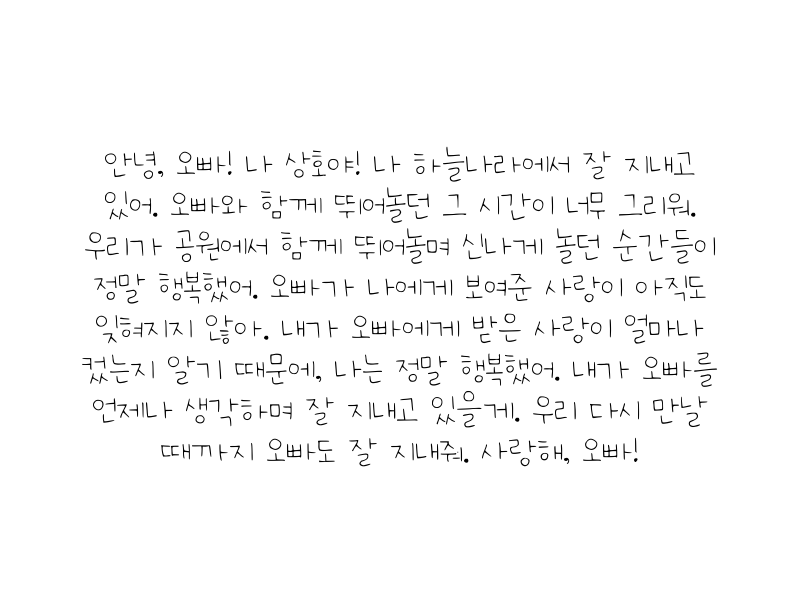

None




In [ ]:
#이미지 생성코드 내장, 만약 interface를 구축할려면 변동 가능
from transformers import TextStreamer
import torch
from PIL import Image, ImageDraw, ImageFont
import textwrap
import os

# inference
FastLanguageModel.for_inference(model)

def chat(name, pet_type, personality, relation, memory):
    # Define the prompt
    prompt = f"""다음은 반려동물의 정보입니다:
이름: {name}
종류: {pet_type}
성격: {personality}
주인과의 관계: {relation}
추억: {memory}
위 정보를 바탕으로 하늘나라에 있는 반려동물의 입장에서 주인에게 보내는 편지를 작성해 주세요.
편지는 반려동물이 주인에게 느꼈던 사랑, 고마움과 그리움을 담되, memory를 정확히 반영하여 없는 내용을 생성하지 않아야 합니다.
편지:
"""

    # Tokenize the prompt
    inputs = tokenizer([prompt], return_tensors="pt").to('cuda')

    # Ensure model is in evaluation mode (important for inference)
    model.eval()

    # Generate text using the model
    outputs = model.generate(**inputs, max_new_tokens=200, use_cache=True)

    # Decode the generated tokens into text
    result = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

    result=extract_letter_content(result)
    # Set max width and initial height
    image_width = 800
    image_height = 600

    # Load font
    font_path = os.path.abspath("나눔손글씨 반짝반짝 별.ttf")
    font_size = 40
    font = ImageFont.truetype(font_path, font_size)

    # Wrap text
    wrapped_text = textwrap.fill(result, width=30)

    # Create image
    image = Image.new('RGB', (image_width, image_height), color=(255, 255, 255))
    draw = ImageDraw.Draw(image)

    # Calculate text size
    text_bbox = draw.multiline_textbbox((0, 0), wrapped_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Adjust image height if needed
    image_height = max(image_height, text_height + 40)

    # Draw text
    text_x = (image_width - text_width) // 2
    text_y = (image_height - text_height) // 2
    draw.multiline_text((text_x, text_y), wrapped_text, font=font, fill=(0, 0, 0), align='center')

    # Save and show image
    image.save(f"{name}'s letter.png")
    image.show()


print("반려동물 편지 생성을 시작합니다. 종료하려면 'quit'를 입력하세요.")
while True:
    name = input("반려동물의 이름을 입력하세요: ")
    if name.lower() == 'quit':
        break
    pet_type = input("반려동물의 종류를 입력하세요: ")
    personality = input("반려동물의 성격을 입력하세요: ")
    relation = input("주인과의 관계를 입력하세요: ")
    memory = input("추억을 입력하세요: ")

    print("\n생성된 편지:")
    letter = chat(name, pet_type, personality, relation, memory)
    print(letter)
    print("\n")

print("편지 생성을 종료합니다.")